In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [2]:
cleansed=cleansed_data()

tsmom_model.py:141: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:143: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool

tsmom_model.py:110: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  corr=df.resample(rule='m',how='last').corr()
tsmom_model.py:130: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt1 =df[x].resample(rule='m',how='last').count()


tsmom_model.py:131: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt2 =df[y].resample(rule='m',how='last').count()


In [3]:
cleansed.count().count()

140

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKEI 225 INDEX
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
Canadian Bankers Acceptance
Russian Ruble

tsmom_model.py:65: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  px=cleansed.resample(rule='d',how='last')
tsmom_model.py:73: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  x= (cleansed.pct_change().abs()/ total_vol).resample(rule='m',how='mean')


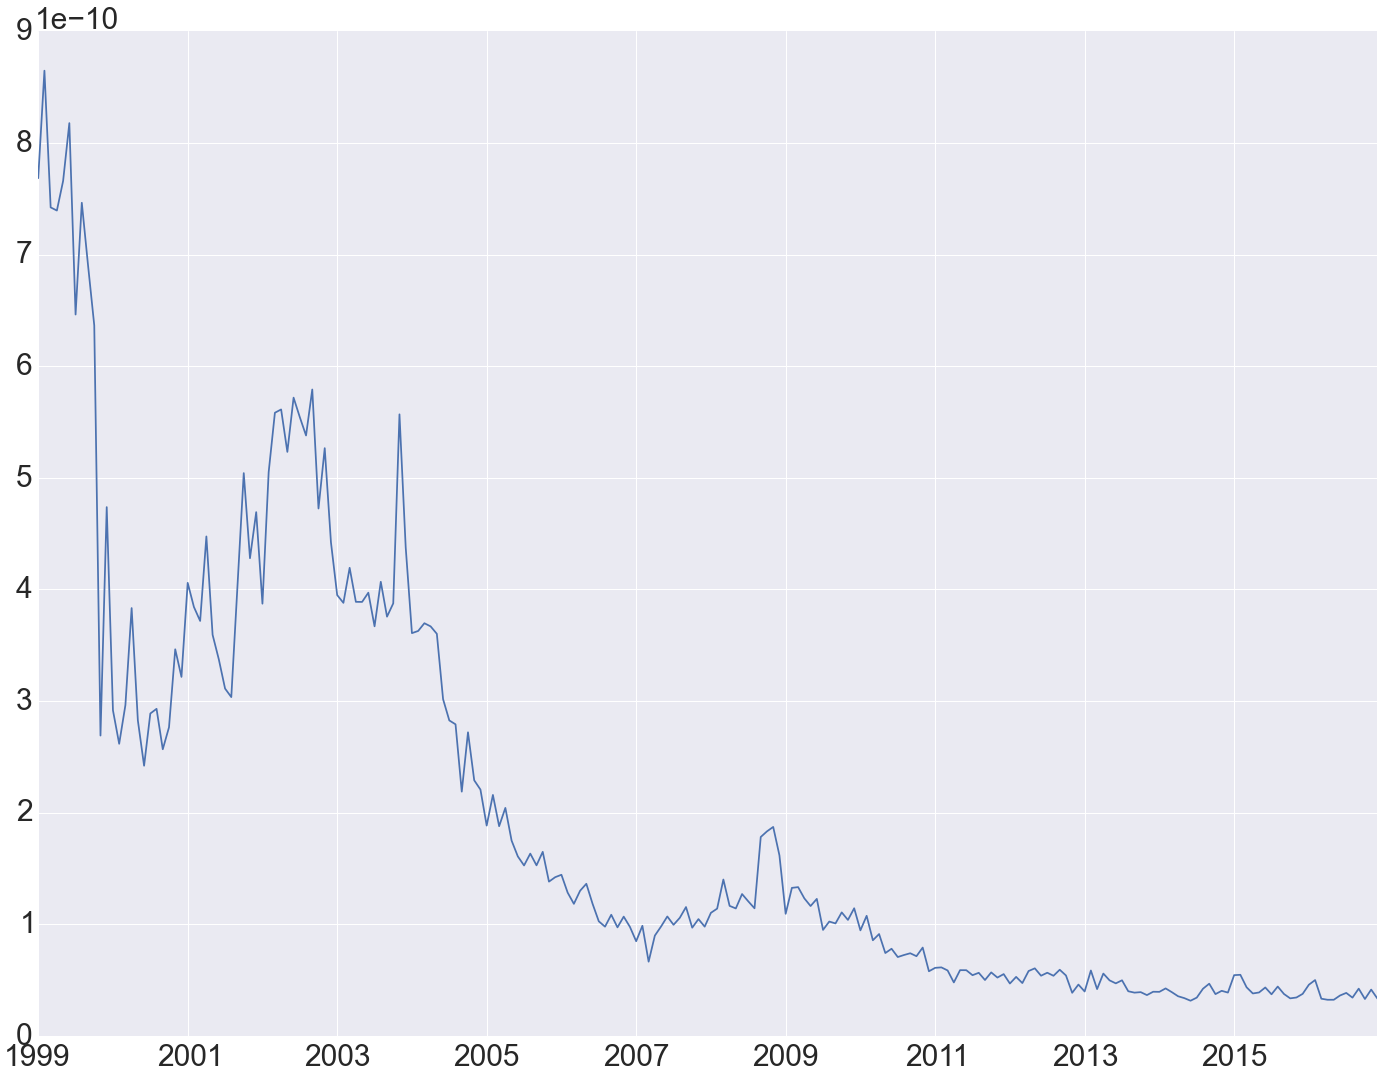

In [5]:
amihud.median(axis=1).dropna().plot()

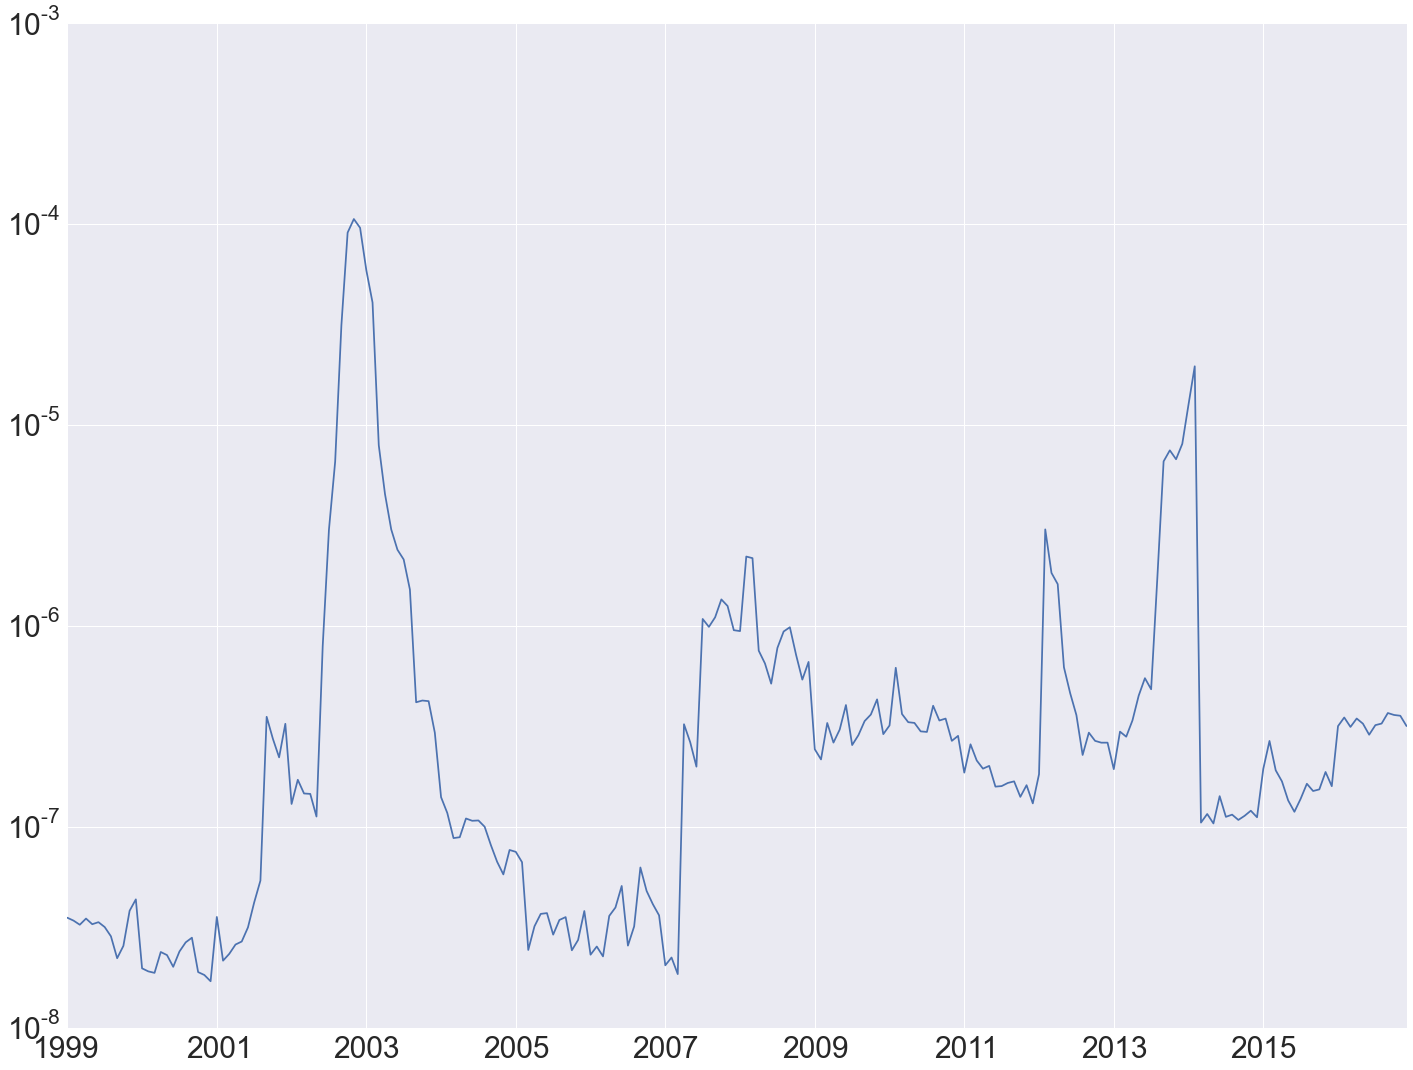

In [25]:
amihud.std(axis=1).dropna().plot(logy=True)

In [10]:
df=pd.DataFrame()
df['LIBOR']=quandl.get('FRED/USDONTD156N').VALUE.resample(rule='m',how='last')
df['FedFunds']=quandl.get('FRED/FEDFUNDS').Value.resample(rule='m',how='last')
df['TED']=quandl.get('FRED/TEDRATE').Value.resample(rule='m',how='last')
df['FinancialStress']=quandl.get('FRED/STLFSI').Value.resample(rule='m',how='last')
df['NBER_Recessions']=quandl.get('FRED/USREC').Value.resample(rule='m',how='last')


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


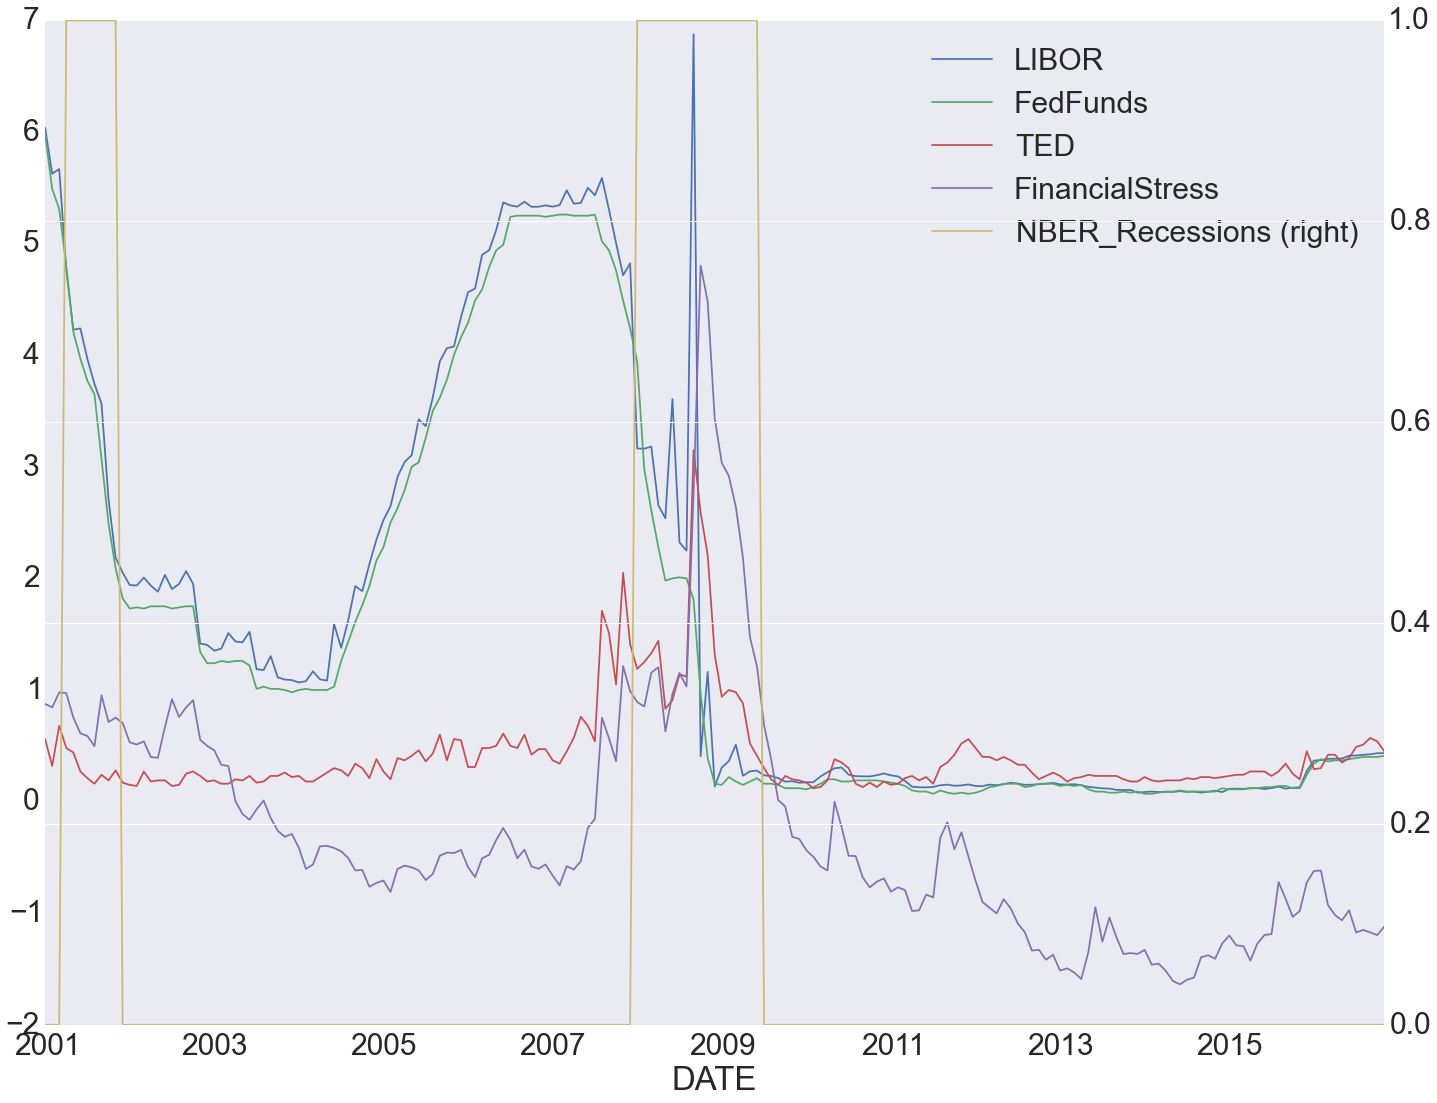

In [12]:
df.plot(secondary_y='NBER_Recessions')

* Run regression on time series of Amihud 
* Break into recession and post recession periods
* Get Currency variance model to copy their approach
* Get VIX as well
